### K-Means clustering

In [10]:
#import all the necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

In [11]:
import math
root="/home/subhash/Desktop/spam/nnfl assignment/NNFL Assignment-1"
data=pd.read_excel(os.path.join(root,'data2.xlsx'),header=None)
print(data.shape)

(150, 4)


In [12]:
#Normalizing function
def normalize(vector):
    for i in range(0,vector.shape[1]):
        temp=vector.iloc[:,i].to_numpy()
        vector.iloc[:,i]=(temp-np.mean(temp))/np.std(temp)
    return vector

In [13]:
data=normalize(data)
data=data.to_numpy()
print(data.shape)

(150, 4)


In [14]:
#initialize clusters
def init_clusters(data,k):
    clusters=[]
    cluster=np.array_split(data,k,axis=0)
    for k in range(0,k):
        clusters.append(cluster[k])
    return (clusters)

In [15]:
#finding centers of the clusters
def calc_centers(clusters):
    centers=[]
    for i in range(0,len(clusters)):
        means=[]
        for j in range(0,4):
            mean=np.mean(clusters[i][:,j])
            means.append(mean)
        centers.append(means)
    return np.array(centers)

In [16]:
#calculate distance of each point with all the centers
def distances(centers,data):
    dists_matrix=[]
    for insts in range(0,data.shape[0]):
        dists=[]
        for k in range(0,centers.shape[0]):
            dist=0
            for x in range(0,centers.shape[1]):
                diff=(centers[k][x])-(data[insts][x])
                dist=dist+(diff)**2
            dist=math.sqrt(dist)
            dists.append(dist)
        dists_matrix.append(dists)
    return(np.array(dists_matrix))

In [17]:
#re-arrange the cluster
def recluster(dists_matrix,data):
    c0=[]
    c1=[]
    c2=[]
    c=[]
    for insts in range(0,dists_matrix.shape[0]):
        instsc=np.argmin(dists_matrix[insts], axis=0)
        if instsc==0:
            c0.append(data[insts])
        elif instsc==1:
            c1.append(data[insts])
        else:              
            c2.append(data[insts])
    cluster=[]
    cluster.append(np.array(c0))
    cluster.append(np.array(c1))
    cluster.append(np.array(c2))
    return (cluster)

In [18]:
def train(data,k):
    clusters=init_clusters(data,k)
   
    iters=0
    while k>0:
        count=0
        iters=iters+1
        c=calc_centers(clusters)
        dists=distances(c,data)
        tempc=c
        clusters=recluster(dists,data)
        c=calc_centers(clusters)
    
        for i in range(0,dists.shape[1]):
            for j in range(0,data.shape[1]):
                if tempc[i][j]-c[i][j]==0:
                    count=count+1
        if (count==k*4):
            break
#1st feature vs all the points      
    fig=plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    ax = plt.gca()
    y1=clusters[0][:,0]
    y2=clusters[1][:,0]
    y3=clusters[2][:,0]
    ax.scatter(np.zeros(y1.shape[0]), y1, label= "class 0", color= "green", marker= ".", s=30)
    ax.scatter(np.zeros(y2.shape[0])+1, y2, label= "class 1", color= "red", marker= ".", s=30)
    ax.scatter(np.zeros(y3.shape[0])+2, y3, label= "class 2", color= "blue", marker= ".", s=30)
    ax.set_title('feature1 vs all the points',fontsize=20) 
    ax.set_xlabel('class',fontsize=14)
    ax.set_ylabel('feture1',fontsize=14)
    plt.legend()
    plt.show()
#2nd feature vs all the points    
    fig=plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    ax = plt.gca()
    y1=clusters[0][:,1]
    y2=clusters[1][:,1]
    y3=clusters[2][:,1]
    ax.scatter(np.zeros(y1.shape[0]), y1, label= "class 0", color= "green", marker= ".", s=30)
    ax.scatter(np.zeros(y2.shape[0])+1, y2, label= "class 1", color= "red", marker= ".", s=30)
    ax.scatter(np.zeros(y3.shape[0])+2, y3, label= "class 2", color= "blue", marker= ".", s=30)
    ax.set_title('feature2 vs all the points',fontsize=20) 
    ax.set_xlabel('class',fontsize=14)
    ax.set_ylabel('feture2',fontsize=14)
    plt.legend()
    plt.show()
#3rd feature vs all the points  
    fig=plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    ax = plt.gca()
    y1=clusters[0][:,2]
    y2=clusters[1][:,2]
    y3=clusters[2][:,2]
    ax.scatter(np.zeros(y1.shape[0]), y1, label= "class 0", color= "green", marker= ".", s=30)
    ax.scatter(np.zeros(y2.shape[0])+1, y2, label= "class 1", color= "red", marker= ".", s=30)
    ax.scatter(np.zeros(y3.shape[0])+2, y3, label= "class 2", color= "blue", marker= ".", s=30)
    ax.set_title('feature3 vs all the points',fontsize=20) 
    ax.set_xlabel('class',fontsize=14)
    ax.set_ylabel('feture3',fontsize=14)
    plt.legend()
    plt.show()
#4th feature vs all the points    
    fig=plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    ax = plt.gca()
    y1=clusters[0][:,3]
    y2=clusters[1][:,3]
    y3=clusters[2][:,3]
    ax.scatter(np.zeros(y1.shape[0]), y1, label= "class 0", color= "green", marker= ".", s=30)
    ax.scatter(np.zeros(y2.shape[0])+1, y2, label= "class 1", color= "red", marker= ".", s=30)
    ax.scatter(np.zeros(y3.shape[0])+2, y3, label= "class 2", color= "blue", marker= ".", s=30)
    ax.set_title('feature4 vs all the points',fontsize=20) 
    ax.set_xlabel('class',fontsize=14)
    ax.set_ylabel('feture4',fontsize=14)
    plt.legend()
    plt.show()
    
    return clusters,c

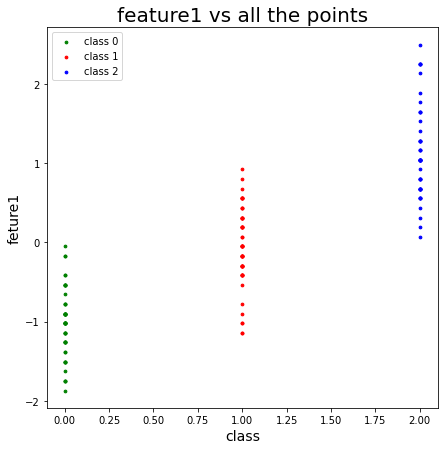

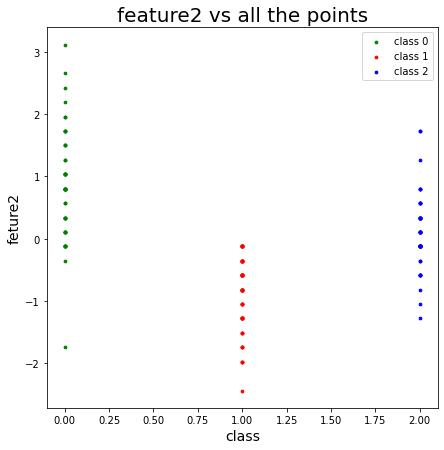

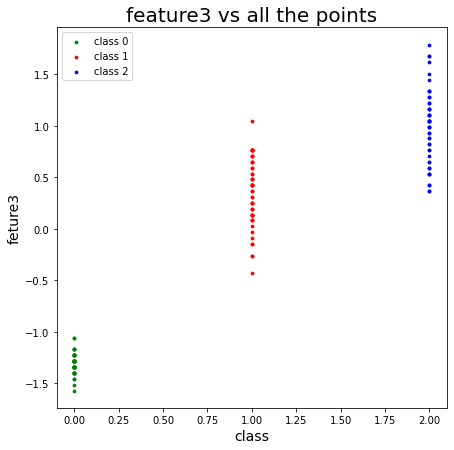

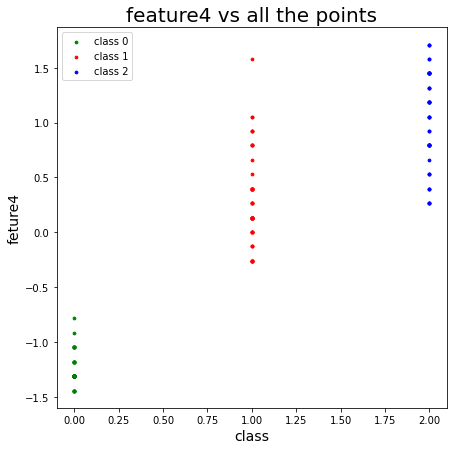

In [19]:
clusters,c=train(data,3)


In [20]:
#c is the centers of all the 3 centers and clusters[0],[1],[2].shape respectively are size of the classes
print(clusters[0].shape)
print(clusters[1].shape)
print(clusters[2].shape)
print(c)

(50, 4)
(53, 4)
(47, 4)
[[-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [-0.05021989 -0.88029181  0.34753171  0.28206327]
 [ 1.13597027  0.09659843  0.996271    1.01717187]]
